<a href="https://colab.research.google.com/github/Marcin19721205/MachineLearingBootCampPartII/blob/main/16_anomaly_detection_time_series_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### prophet
Strona biblioteki: [https://facebook.github.io/prophet/](https://facebook.github.io/prophet/)  

Dokumentacja/User Guide: [https://facebook.github.io/prophet/docs/quick_start.html](https://facebook.github.io/prophet/docs/quick_start.html)

Biblioteka do pracy z szeregami czasowymi od Facebook'a

Aby zainstalować bibliotekę prophet, użyj polecenia poniżej:
```
!pip install fbprophet
```
Aby zaktualizować do najnowszej wersji użyj polecenia poniżej:
```
!pip install --upgrade fbprophet
```
Kurs stworzony w oparciu o wersję `0.5`

### Spis treści:
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Przygotowanie danych](#3)
5. [Prophet - budowa modelu](#4)
6. [Wizualizacja działania modelu](#5)
7. [Budowa modelu - wrzesień](#6)




### <a name='0'></a> Import bibliotek

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px

# Uninstall fbprophet and pystan to ensure a clean install of the new prophet package
!pip uninstall -y fbprophet pystan

# Install the modern 'prophet' library (successor to fbprophet)
!pip install -q prophet

# Import prophet (it might still be available under fbprophet namespace for compatibility)
# but the recommended import is now 'from prophet import Prophet'
try:
    from prophet import Prophet
    import prophet
    print(f"Prophet version: {prophet.__version__}")
except ImportError:
    # Fallback for older installations that still used fbprophet namespace
    import fbprophet as prophet
    from fbprophet import Prophet
    print(f"fbprophet version: {prophet.__version__}")

np.random.seed(41)

Prophet version: 1.2.1


### <a name='1'></a> Załadowanie danych

In [10]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/traffic.csv',
                 parse_dates=['timestamp']) #kolumna 'timestamp' jest parsowana jako data
df.head()

timestamp    count
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  14398 non-null  datetime64[ns]
 1   count      14398 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


### <a name='2'></a> Wizualizacja danych

wykres liniowy

In [12]:
px.line(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
        template='plotly_dark', color_discrete_sequence=['#42f5d4'])

wykres punktowy

In [13]:
px.scatter(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
           template='plotly_dark', color_discrete_sequence=['#42f5d4'])

### <a name='3'></a> Przygotowanie danych

In [14]:
df.head(3)

timestamp    count
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917

In [15]:
data = df.copy()
data.columns = ['ds', 'y']
data.head(3)

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917

Danymi wejściowymi do klasy Prophet jest obiekt DataFrame biblioteki pandas. Wejściowy DataFrame składa się z dwóch kolumn:
* ds (datestamp, odpowiednio sformatowana kolumna, np. YYYY-MM-DD dla daty, YYYY-MM-DD HH:MM:SS dla dokładnego czasu )
* y (kolumna numeryczna, reprezentująca wartość, którą chcemy przewidywać)


### <a name='4'></a> Prophet - budowa modelu

In [18]:
from prophet import Prophet

Prophet?

In [19]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False,
                interval_width=0.99, changepoint_range=0.8)

model.fit(data)
forecast = model.predict(data)

In [20]:
forecast.head(3)

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2018-09-25 14:01:00  111.442675  132.559231  187.331496   111.442675   
1 2018-09-25 14:02:00  111.444066  130.068874  191.579090   111.444066   
2 2018-09-25 14:03:00  111.445456  135.303443  185.745744   111.445456   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   111.442675       48.903208             48.903208             48.903208   
1   111.444066       48.968552             48.968552             48.968552   
2   111.445456       49.030363             49.030363             49.030363   

       daily  daily_lower  daily_upper  multiplicative_terms  \
0  48.903208    48.903208    48.903208                   0.0   
1  48.968552    48.968552    48.968552                   0.0   
2  49.030363    49.030363    49.030363                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  160.345883  
1                         0.0                         0.0  160.412618  
2                         0.0                         0.0  160.475819

In [21]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  111.442675  160.345883  132.559231  187.331496
1 2018-09-25 14:02:00  111.444066  160.412618  130.068874  191.579090
2 2018-09-25 14:03:00  111.445456  160.475819  135.303443  185.745744

In [22]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2018-09-25 14:01:00  111.442675  132.559231  187.331496   111.442675   
1 2018-09-25 14:02:00  111.444066  130.068874  191.579090   111.444066   
2 2018-09-25 14:03:00  111.445456  135.303443  185.745744   111.445456   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   111.442675       48.903208             48.903208             48.903208   
1   111.444066       48.968552             48.968552             48.968552   
2   111.445456       49.030363             49.030363             49.030363   

       daily  daily_lower  daily_upper  multiplicative_terms  \
0  48.903208    48.903208    48.903208                   0.0   
1  48.968552    48.968552    48.968552                   0.0   
2  49.030363    49.030363    49.030363                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  \
0                         0.0                         0.0  160.345883   
1                         0.0                         0.0  160.412618   
2                         0.0                         0.0  160.475819   

      real  anomaly  
0  182.478        1  
1  176.231        1  
2  183.917        1

### <a name='5'></a> Wizualizacja działania modelu

In [23]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl',
           title='Anomaly Detection in Time Series', template='plotly_dark', width=950, height=500)

In [24]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

ds
0     2018-09-25 14:01:00
1     2018-09-25 14:02:00
2     2018-09-25 14:03:00
3     2018-09-25 14:04:00
4     2018-09-25 14:05:00
...                   ...
15833 2018-10-06 13:54:00
15834 2018-10-06 13:55:00
15835 2018-10-06 13:56:00
15836 2018-10-06 13:57:00
15837 2018-10-06 13:58:00

[15838 rows x 1 columns]

In [25]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  160.345883  134.797878  186.391968
1 2018-09-25 14:02:00  160.412618  130.022224  189.723137
2 2018-09-25 14:03:00  160.475819  131.390141  187.339318
3 2018-09-25 14:04:00  160.535462  132.995579  188.132261
4 2018-09-25 14:05:00  160.591519  131.310557  189.525010

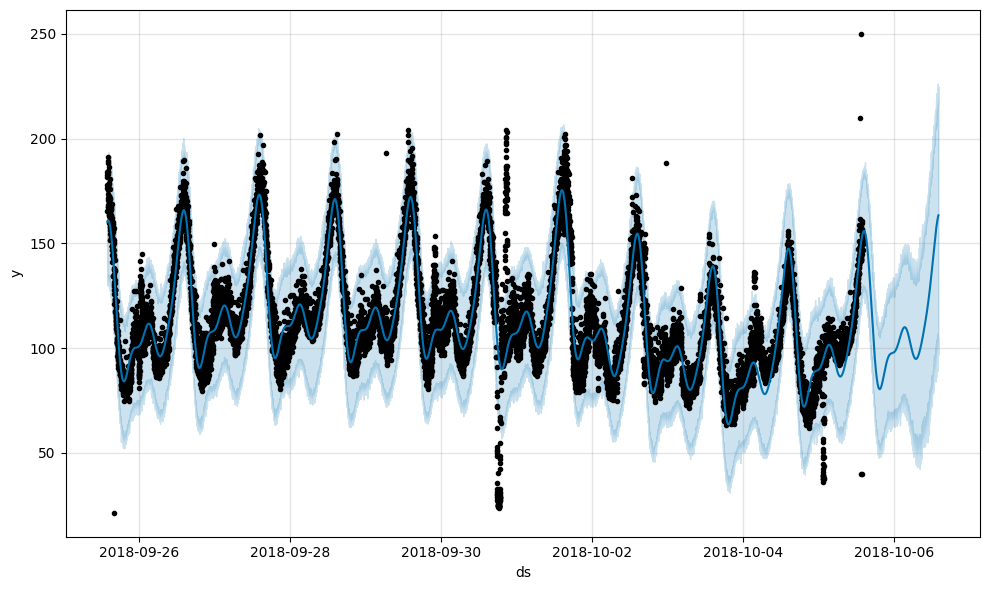

In [26]:
_ = model.plot(forecast)

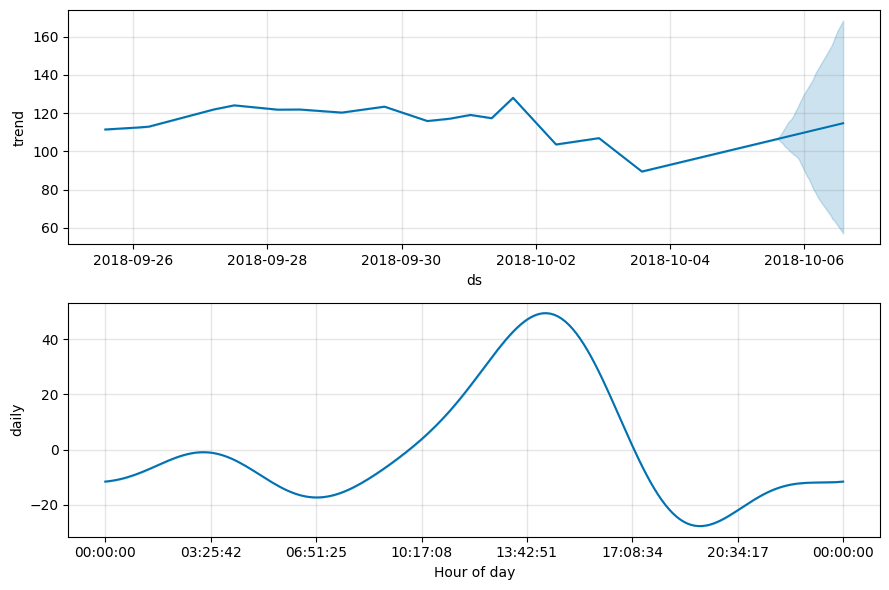

In [27]:
_ = model.plot_components(forecast)

In [29]:
from prophet.plot import plot_plotly

plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')

### <a name='6'></a> Budowa modelu - wrzesień

In [30]:
data_sep = df[df['timestamp'].dt.month == 9]
data_sep.columns = ['ds', 'y']
data_sep.head()

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [31]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False,
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(data_sep)
forecast = model.predict(data_sep)
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  115.267995  165.688677  133.566626  195.242813
1 2018-09-25 14:02:00  115.251649  165.715276  138.018143  200.242843
2 2018-09-25 14:03:00  115.235302  165.737964  136.131190  196.558422

In [32]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2018-09-25 14:01:00  115.267995  133.566626  195.242813   115.267995   
1 2018-09-25 14:02:00  115.251649  138.018143  200.242843   115.251649   
2 2018-09-25 14:03:00  115.235302  136.131190  196.558422   115.235302   

   trend_upper     daily  daily_lower  daily_upper  multiplicative_terms  \
0   115.267995  0.437421     0.437421     0.437421              0.437421   
1   115.251649  0.437856     0.437856     0.437856              0.437856   
2   115.235302  0.438257     0.438257     0.438257              0.438257   

   multiplicative_terms_lower  multiplicative_terms_upper  additive_terms  \
0                    0.437421                    0.437421             0.0   
1                    0.437856                    0.437856             0.0   
2                    0.438257                    0.438257             0.0   

   additive_terms_lower  additive_terms_upper        yhat     real  anomaly  
0                   0.0                   0.0  165.688677  182.478        1  
1                   0.0                   0.0  165.715276  176.231        1  
2                   0.0                   0.0  165.737964  183.917        1

In [33]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl',
           title='Anomaly Detection in Time Series - September', template='plotly_dark', width=950, height=500)

In [34]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

ds
0    2018-09-25 14:01:00
1    2018-09-25 14:02:00
2    2018-09-25 14:03:00
3    2018-09-25 14:04:00
4    2018-09-25 14:05:00
...                  ...
9234 2018-10-01 23:55:00
9235 2018-10-01 23:56:00
9236 2018-10-01 23:57:00
9237 2018-10-01 23:58:00
9238 2018-10-01 23:59:00

[9239 rows x 1 columns]

In [35]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  165.688677  135.630913  198.887016
1 2018-09-25 14:02:00  165.715276  130.910403  196.603611
2 2018-09-25 14:03:00  165.737964  133.383870  197.409510
3 2018-09-25 14:04:00  165.756721  138.261054  196.675655
4 2018-09-25 14:05:00  165.771524  138.331622  196.964622

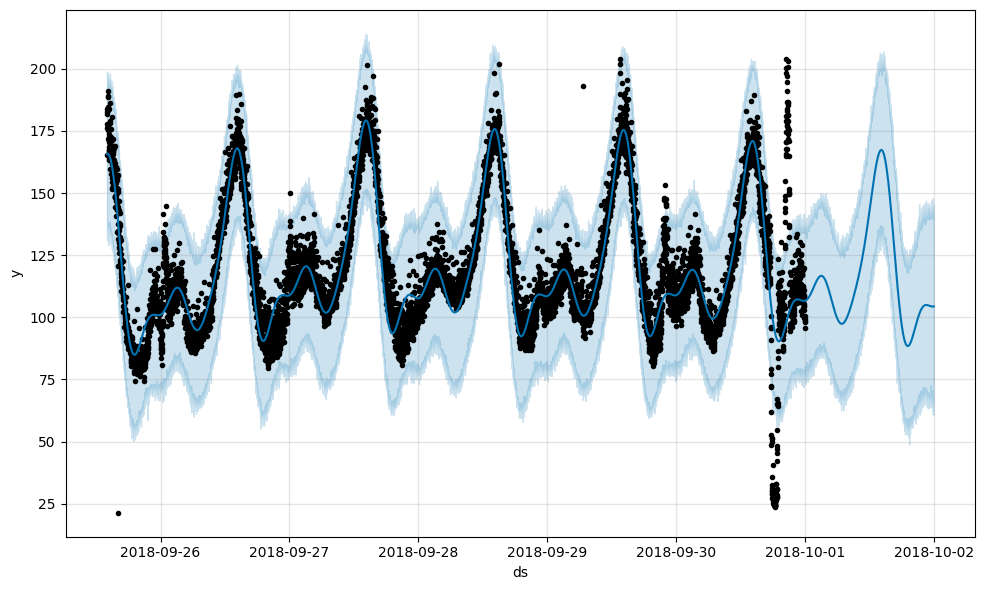

In [36]:
_ = model.plot(forecast)

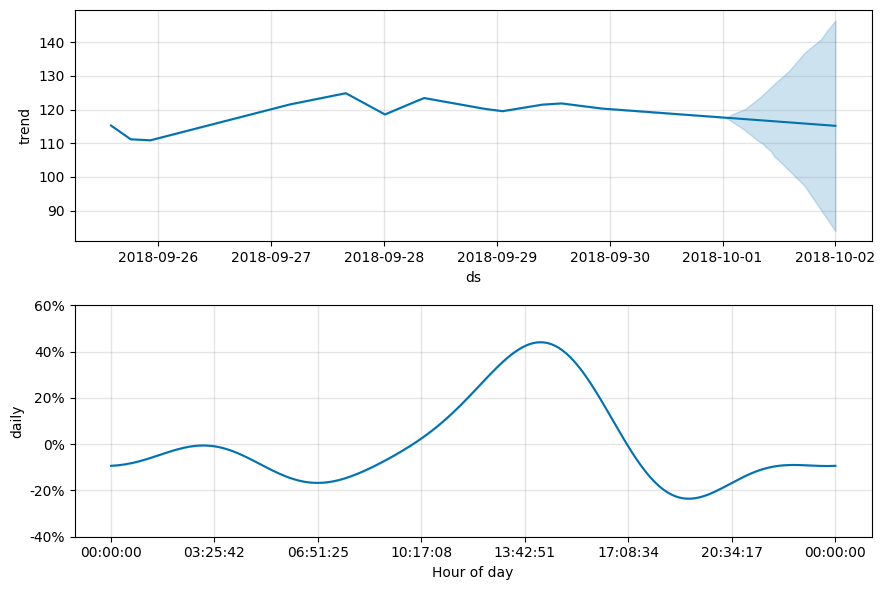

In [37]:
_ = model.plot_components(forecast)

In [38]:
plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')